## Question 2: How does an author's reputation drive the reach and reception of a book? Does a wider audience lead to lower average ratings because of broader scrutiny?

**Approach:**

The quantiles, min, max are also used for establishing ranges

1. **Group Definitions:**
    * We split the authors into 5 groups based on the popularity
2. **The correlation:**
    * We will display the correlation of followers count with votes, num_ratings and rating for quick look, because the data is already contains successfully books, the votes information may not useful for us
    * About the followers count with rating and num_ratings, we can use Spearman Correlation (the data is not a normal distribution and it less sensitive to outliners)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Formatting options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
np.set_printoptions(suppress = True, linewidth = 120, edgeitems = 5)
sns.set_theme(style="whitegrid")

In [2]:
# 1. Load data and view structure

dataPath = "../../Data/Raw/parsed_books_data.tsv"

df = pd.read_csv(dataPath, sep = "\t", na_values = ["NA"])

sampleCount, featureCount = df.shape

In [3]:
df["author_followers_count"].describe()

count      5278.000000
mean      27791.738916
std       87762.918476
min           2.000000
25%         691.250000
50%        3589.500000
75%       16700.000000
max      868000.000000
Name: author_followers_count, dtype: float64

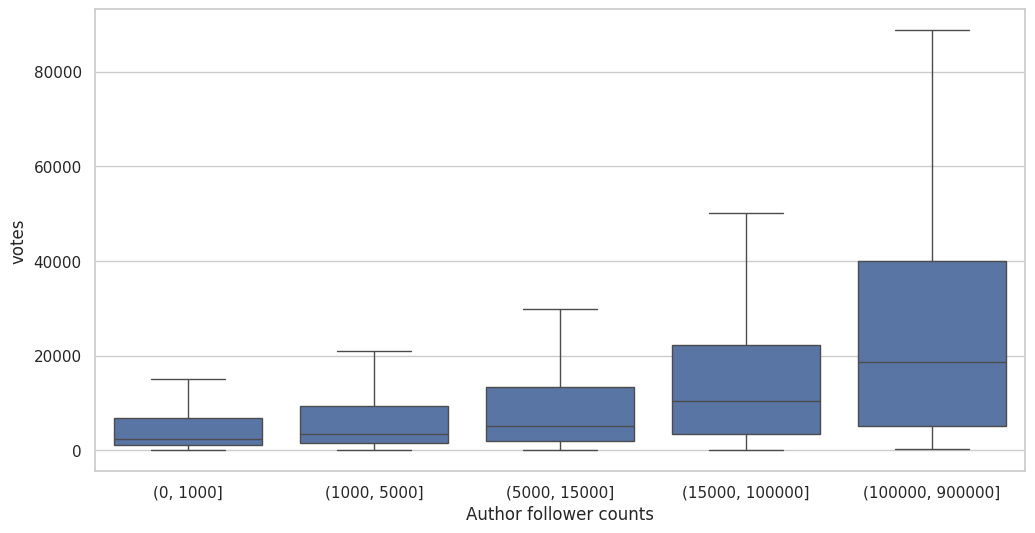

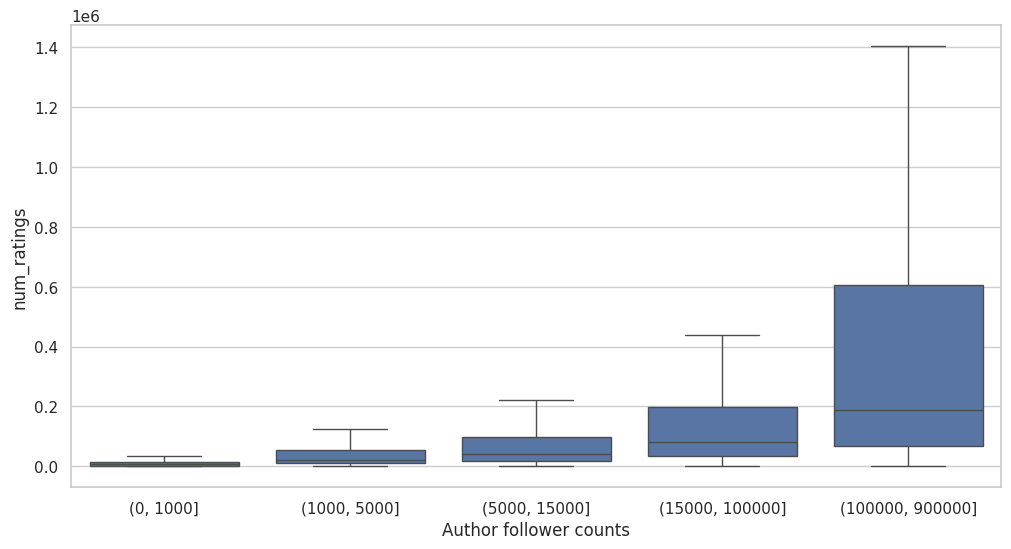

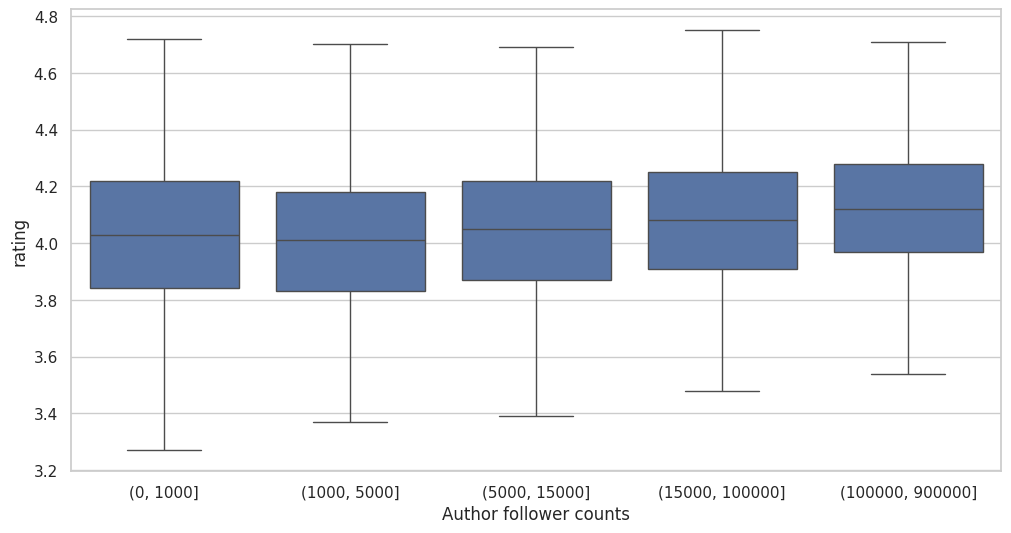

In [4]:
bins = [0, 1000, 5000, 15000, 100000, 900000]
df["binned"] = pd.cut(df["author_followers_count"], bins)
for column in ["votes", "num_ratings", "rating"]:
    plt.figure(figsize=(12, 6))

    sns.boxplot(
        x=df["binned"], 
        y=df[column], 
        data=df.groupby("binned", observed=True)[column].apply(pd.DataFrame), 
        # palette="viridis", 
        showfliers=False
    ).set(
        xlabel = "Author follower counts",
    )

    plt.show()

### 1. How does an author's reputation drive the reach and reception of a book?

* From the visualization, it is clear that the results are better when the author is more famous. To comfirm this, we can compute the Spearman correlation

In [5]:
from scipy import stats

bins = [0, 1000, 5000, 15000, 100000, 900000]
df["author_tier"] = pd.cut(df["author_followers_count"], bins)
tiers = df["author_tier"].unique().sort_values()
reach_groups = [df[df["author_tier"] == tier]["num_ratings"].dropna() for tier in tiers]

corr_reach, _ = stats.spearmanr(df['author_followers_count'], df['num_ratings'], nan_policy='omit')
print(f"Spearman Correlation (Followers vs. Reach): {corr_reach:.4f}")

Spearman Correlation (Followers vs. Reach): 0.6839


* We got a strongly positive correlation which supports the hypothesis that more followers leads to the higher of number of ratings 

#### Conclusion

* The author's reputation drive the reach and reception of a book positively. Tthe more the author popular, the more books are sold

### 2. Does a wider audience lead to lower average ratings because of broader scrutiny?

In [6]:
corr_qual, p_qual = stats.spearmanr(df['author_followers_count'], df['rating'], nan_policy='omit')
print(f"Spearman Correlation (Followers vs. Rating Value): {corr_qual:.4f}")

Spearman Correlation (Followers vs. Rating Value): 0.0908


* We found a small correlation indicating no significant relationship between follower count and ratings/average ratings. However, if we examine the 25th percentile from the visualization, it slightly increases as the authors have more followers

#### Conclusion

* We can't determine if a wider audience leads to lower average ratings due to broader scrutiny, but at least the minimum ratings of the books have increased